# Giga coders
## Machine learning

24 Agostos 2019


## Multilayer Perceptron (MLP)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

Multilayer perceptrons are sometimes colloquially referred to as "vanilla" neural networks, especially when they have a single hidden layer

![alt text](https://images.deepai.org/glossary-terms/49157de013394ab7a36022759a55b6aa/multipercep.jpg)

![alt text](https://miro.medium.com/max/958/1*QVIyc5HnGDWTNX3m-nIm9w.png)


## XOR Problem
![alt text](https://www.researchgate.net/profile/A_Zahedi/publication/321687478/figure/fig2/AS:602499278979075@1520658430966/a-circuit-symbol-and-b-accuracy-table-of-the-XOR-logic-gate.png)


In [0]:

import tensorflow as tf
import cv2
import numpy as np
from numpy import array, dot, random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import choice
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.0, 9.0)
print("alles ist gut")


alles ist gut


In [0]:
entradas = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], np.float32)
salidas = np.array([0, 1, 1, 0], np.float32)
salidas = np.reshape(salidas, [4,1])
print("Entradas....")
print(entradas)
print("Salidas....")
print(salidas)

Entradas....
[[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
Salidas....
[[0.]
 [1.]
 [1.]
 [0.]]


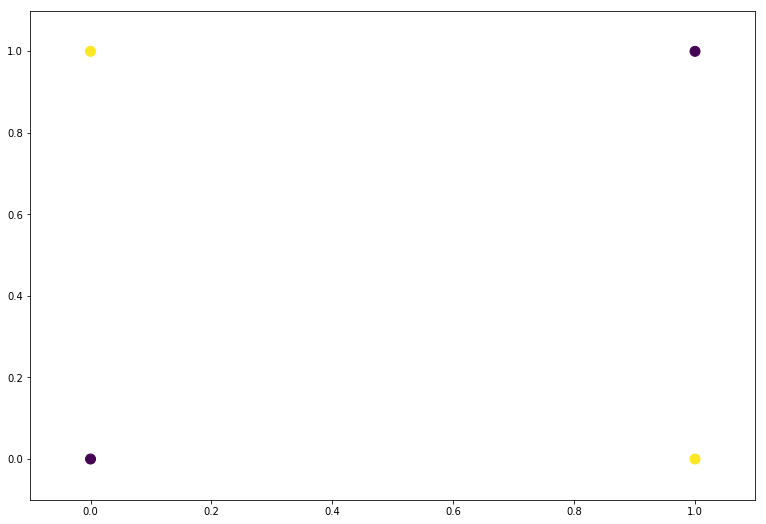

In [0]:
plot_x = np.array([np.min(entradas[:, 0] - 0.2), np.max(entradas[:, 1]+0.2)])


plt.scatter(entradas[:, 0], entradas[:, 1], c=salidas.ravel(), s=100, cmap='viridis')
plt.xlim([-0.1, 1.1]); plt.ylim([-0.1, 1.1]);
plt.show()

![alt text](https://nasirml.files.wordpress.com/2017/12/xor_2.png?w=483&h=231)

![alt text](https://pns2018.github.io/images/neuron.png)



#### h = g((W1*x)+b1)
#### yHat = f((W2*h)+b2)
#### yHat =  f((W2* g((W1*x)+b1)) + b2)

In [0]:
def multi_layer_perceptron_xor(x, weights, biases):
  hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
  hidden_layer1 = tf.nn.sigmoid(hidden_layer1)
  out_layer = tf.add(tf.matmul(hidden_layer1, weights['w_out']), biases['b_out'])
 
  return out_layer

In [0]:
num_input = 2
num_hidden1 = 2
num_output = 1
num_inter = 100000
display_step = int(num_inter / 10)
learning_rate = 0.01

In [0]:
X = tf.placeholder(tf.float32, shape=[4, num_input])
Y = tf.placeholder(tf.float32, shape=[4, num_output])

In [0]:
weights = {
 'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])),
 'w_out': tf.Variable(tf.random_normal([num_hidden1, num_output]))
}
 
biases = {
 'b_h1' : tf.Variable(tf.zeros([num_hidden1])),
 'b_out': tf.Variable(tf.zeros([num_output]))
}

In [0]:
model = multi_layer_perceptron_xor(X, weights, biases)
loss_func = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_func)


W0824 04:35:29.563145 140416269395840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for k in range(num_inter):
    tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={X: entradas, Y: salidas})
    if k % display_step == 0:
        #print('output: ', sess.run(model, feed_dict={X:x}))
        print('loss= ' + "{:.5f}".format(tmp_cost))

# separates the input space
W = np.squeeze(sess.run(weights['w_h1']))   # 2x2
b = np.squeeze(sess.run(biases['b_h1']))    # 2,



sess.close()

loss= 2.77761
loss= 1.87083
loss= 0.13756
loss= 0.05858
loss= 0.03668
loss= 0.02658
loss= 0.02080
loss= 0.01706
loss= 0.01445
loss= 0.01253


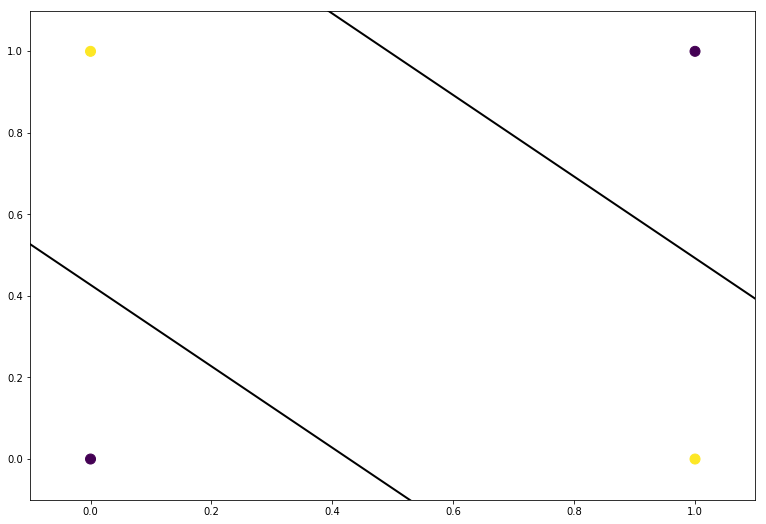

In [0]:

plot_x = np.array([np.min(entradas[:, 0] - 0.2), np.max(entradas[:, 1]+0.2)])
plot_y = (-1 * (W[0,0] * plot_x + b[0]))/W[1,0]
plot_y2 = (-1 * (W[0,1] * plot_x + b[1]))/W[1,1]

 
plt.scatter(entradas[:, 0], entradas[:, 1], c=salidas.ravel(), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.plot(plot_x, plot_y2, color='k', linewidth=2)
plt.xlim([-0.1, 1.1]); plt.ylim([-0.1, 1.1]);
plt.show()
